<a href="https://colab.research.google.com/github/Savana-Alshubayli/AI/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


# Task 1: Data Preparation

In [8]:
# 1. Load and read the Apple Quality datatset, a binary classification dataset.
url = "https://raw.githubusercontent.com/rjdp07/Apple_Quality/main/apple_quality.csv"
data = pd.read_csv(url)


# 2.Display the first five rows of the dataset to understand the dataset structure.
print(data.head())

# 3. Handle missing values if present, by removing the examples with missing features from the dataset.
data = data.dropna()

# 4. Extract features and target columns into X and y, respectively.
X = data.drop(columns=['Quality'])  # Adjust column name if needed
y = data['Quality'].map({'bad': 0, 'good': 1})

# 5. Check the distribution of the target variable.
print(y.value_counts())

# 6. Split the data into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Apply feature scaling (standardization) to the features.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good  
Quality
1    2004
0    1996
Name: count, dtype: int64


# Task 2: Logistic Regression Implementation

In [9]:
# 1. Implement logistic regression without regularization using sklearn library.

model = LogisticRegression(penalty=None)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# 2. Use the trained logistic regression model to predict the target values for the testing set.

y_pred = model.predict(X_test)

# 3. Calculate and print the evaluation metrics for the model

def evaluate_model(y_true, y_pred, model):
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, model.predict_proba(X_test)[:, 1]):.4f}")

evaluate_model(y_test, y_pred, model)


Accuracy: 0.7525
Precision: 0.7519
Recall: 0.7519
F1-score: 0.7519
ROC-AUC: 0.8227


# Task 3: Logistic Regression with Regularization


Regularization Strength C=0.1
Accuracy: 0.7538
Precision: 0.7538
Recall: 0.7519
F1-score: 0.7528
ROC-AUC: 0.8230

Regularization Strength C=1
Accuracy: 0.7538
Precision: 0.7525
Recall: 0.7544
F1-score: 0.7534
ROC-AUC: 0.8228

Regularization Strength C=10
Accuracy: 0.7525
Precision: 0.7519
Recall: 0.7519
F1-score: 0.7519
ROC-AUC: 0.8227


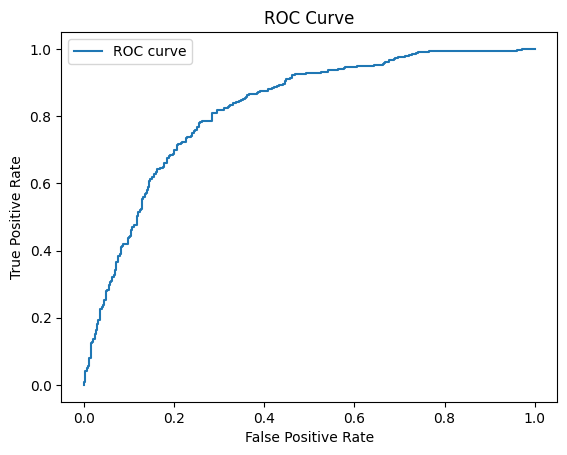

In [10]:
# 1. Implement logistic regression with L2 regularization. Experiment with different regularization strengths (e.g., C = 0.1, 1, 10).
for C in [0.1, 1, 10]:
    model = LogisticRegression(C=C, penalty='l2')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nRegularization Strength C={C}")
    evaluate_model(y_test, y_pred, model)

# 2. Calculate and print the same metrics for each regularization strength
best_model = LogisticRegression(C=1, penalty='l2')  # Adjust based on performance
best_model.fit(X_train, y_train)
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Task 4: Comparison and AUC Visualization


Model Performance Comparison:
      C  Accuracy  Precision    Recall  F1-score   ROC-AUC
0   0.1   0.75375   0.753769  0.751880  0.752823  0.822974
1   1.0   0.75375   0.752500  0.754386  0.753442  0.822755
2  10.0   0.75250   0.751880  0.751880  0.751880  0.822718


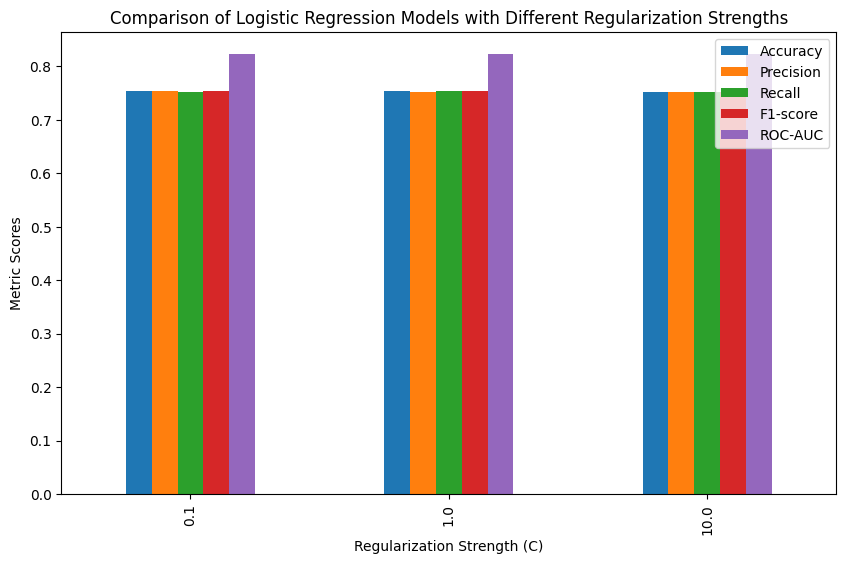

In [11]:
# 2. Plot the ROC curve for the best-performing model in terms of accuracy.

results = []
for C in [0.1, 1, 10]:
    model = LogisticRegression(C=C, penalty='l2')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    results.append((C, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
                    recall_score(y_test, y_pred), f1_score(y_test, y_pred), auc_score))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['C', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC'])
print("\nModel Performance Comparison:")
print(results_df)

# Visualize comparison
results_df.set_index('C').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Logistic Regression Models with Different Regularization Strengths')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Metric Scores')
plt.legend(loc='best')
plt.show()
